
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

#### Plan för att analysera heart datasetet:  
Typ av problem: binärt klassificeringsproblem (cardio eller inte cardio)  
Dataset: Använder samma data som i Machine Learning kursen. Feature engineering är redan gjord.  
Två dataset finns:  
1. Linjär data:  
2. Kategorisk data:  

Workflow:  
1. Läs in data, gör EDA, kom ihåg vad vi gjorde i ML kursen, mm. Börjar med categorical data eftersom den visade bäst resultat i ML kursen.  
2. Definiera Explanatory Variables (X) och Response Variable (y)  
3. Definera träningsdata, valideringsdata och testdata (train/val/test-split)  
4. Normalisera datan med Standard scaler  
5. Bygg modellen (definiera en funktion som bygger modellen baserat på argument)  
6. Utvärdera modellen/modellerna.


In [358]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [359]:
df_heart = pd.read_csv(r'data/Heart.csv', sep=',')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [360]:
df_heart = pd.get_dummies(df_heart)
df_heart.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,...,0.0,False,False,False,True,True,False,False,True,False
1,2,67,1,160,286,0,2,108,1,1.5,...,3.0,True,False,False,False,False,True,False,False,True
2,3,67,1,120,229,0,2,129,1,2.6,...,2.0,True,False,False,False,False,False,True,False,True
3,4,37,1,130,250,0,0,187,0,3.5,...,0.0,False,True,False,False,False,True,False,True,False
4,5,41,0,130,204,0,2,172,0,1.4,...,0.0,False,False,True,False,False,True,False,True,False


In [361]:
df_heart = df_heart.dropna()

In [362]:
X, y = df_heart.drop(['AHD_Yes', 'AHD_No'], axis=1), df_heart['AHD_Yes']

In [363]:
X = X.drop(columns=['Unnamed: 0'])
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,False,True,True,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,True,False,False,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,2.0,True,False,False,False,False,False,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,False,True,False,False,False,True,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,False,False,True,False,False,True,False


In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=80/318, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 18), (60, 18), (239,), (60,))

In [365]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#X_train_val_scaled = scaler.transform(X_train_val)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [366]:
import keras
from keras import layers
from keras.optimizers import SGD, Adam

In [367]:
#optimizer = keras.optimizers.Adam(learning_rate=0.01)
#optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
#loss = "sparse_categorical_crossentropy"

# Alternative loss functions
# loss = "categorical_crossentropy"
# loss = "binary_crossentropy"
# loss = "hinge"
# loss = "squared_hinge"
# loss = "mean_squared_error"
# loss = "mean_absolute_error"
# loss = "mean_absolute_percentage_error"
# loss = "mean_squared_logarithmic_error"

In [368]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def make_model(nodes = None, names = None, activations = [], optimizer=None, loss="binary_crossentropy"):
    model = keras.Sequential(name="MLP")
    #model.add(layers.Flatten(input_shape=(28,28), name="Input"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, name=name, activation=activation))

    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

    return model

def plot_metrics(df_history, style="-o", title = "Title"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0], title=f"{title}, {metric[0]}",
                        #ylim=(0, 1),
                        ax=ax, style=style)


def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix", model_name="model_name"):
    cm = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, target_names=labels)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix\n{model_name}")
    plt.show()
    print(classification_rep)

Defining optimizer and loss function:

## Model_1
Defining model_deep_1:

In [369]:
model_try = keras.Sequential([
    
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [370]:
model_try.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [371]:
model_try.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [372]:
history = model_try.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7439 - loss: 0.5637 - val_accuracy: 0.8125 - val_loss: 0.4648
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8279 - loss: 0.3859 - val_accuracy: 0.8333 - val_loss: 0.4788
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8641 - loss: 0.3320 - val_accuracy: 0.8125 - val_loss: 0.4854
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8816 - loss: 0.2476 - val_accuracy: 0.8125 - val_loss: 0.5155
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9075 - loss: 0.2391 - val_accuracy: 0.8333 - val_loss: 0.5329
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9084 - loss: 0.2721 - val_accuracy: 0.8125 - val_loss: 0.5466
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9256 - loss: 0.2582 - val_accuracy: 0.7917 - val_loss: 0.5618
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9469 - loss: 0.1862 - val_accuracy: 0.7917 - val_loss: 0.6005
Epoch 9/50
6/6 ━━━

In [373]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [374]:
model_try.evaluate(X_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8694 - loss: 0.4355 


[0.45456981658935547, 0.8666666746139526]

In [375]:
model_try_history = pd.DataFrame(history.history)

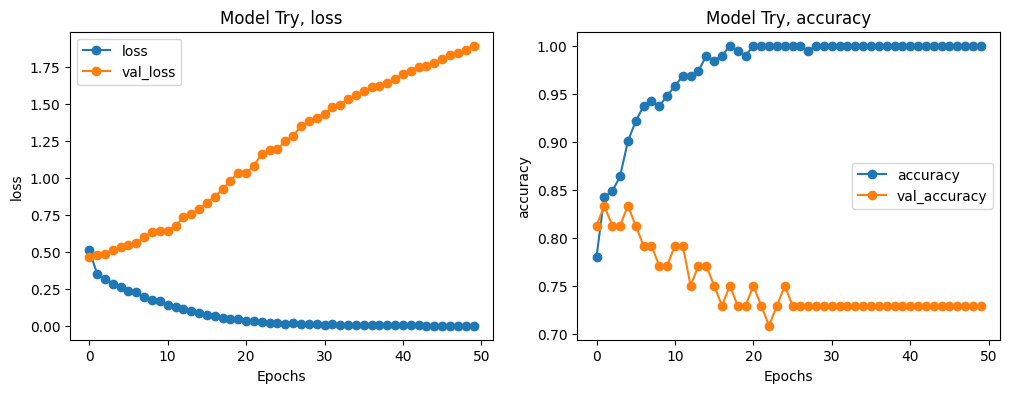

In [376]:
plot_metrics(model_try_history, title="Model Try")

In [347]:
model_deep_1 = make_model([512,512,1],
                          activations=["relu", "relu", "sigmoid"],
                          names=["Hidden_1", "Hidden_2", "Output"],
                          #optimizer=keras.optimizers.Adam(learning_rate=0.01),
                          optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
                          loss = "binary_crossentropy",
                          )

model_deep_1.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [348]:
#model_deep_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
model_deep_1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
#model_deep_1.fit(X_train_val_scaled, y_train_val, epochs=25, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0) # provar detta istället för validation_split

In [350]:
model_deep_1.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [316]:
deep_1_history = pd.DataFrame(model_deep_1.history.history)

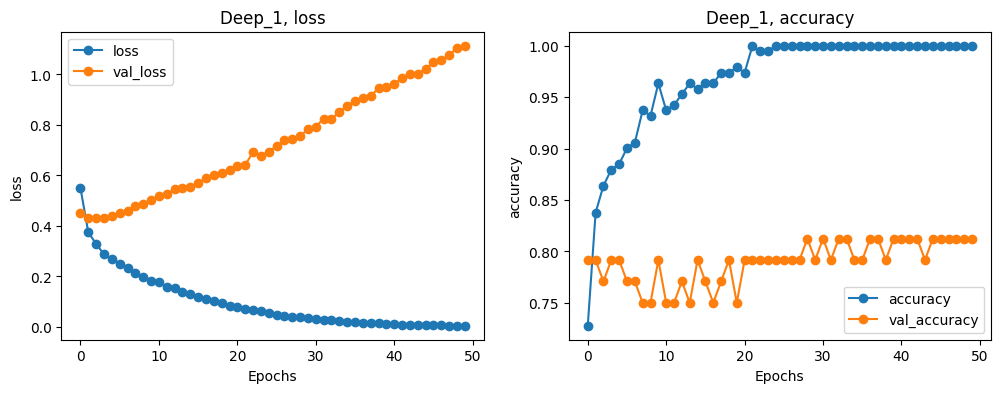

In [317]:
plot_metrics(deep_1_history, title = "Deep_1")

Predict y_pred.

In [300]:
test_loss, test_acc = model_deep_1.evaluate(X_test, y_test, verbose=0)
test_loss, test_acc

(228.3906707763672, 0.550000011920929)

In [301]:
model_deep_1_y_pred = model_deep_1.predict(X_test_scaled)
#model_deep_1_y_pred = model_deep_1.predict(X_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

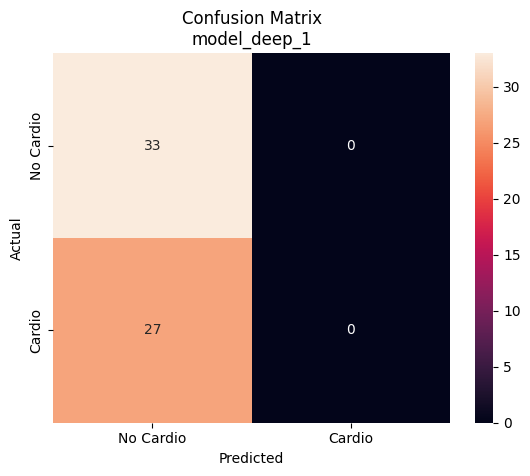

              precision    recall  f1-score   support

   No Cardio       0.55      1.00      0.71        33
      Cardio       0.00      0.00      0.00        27

    accuracy                           0.55        60
   macro avg       0.28      0.50      0.35        60
weighted avg       0.30      0.55      0.39        60



In [302]:
plot_confusion_matrix(y_test, model_deep_1_y_pred.argmax(axis=1), ["No Cardio", "Cardio"], model_name="model_deep_1")

## Model2:
Defining model_deep_2:

In [171]:
model_deep_2 = make_model([128,128,128,1],
                          activations=["relu", "relu","relu","sigmoid"],
                          names=["Hidden_1", "Hidden_2","Hidden_3","Output"],
                          optimizer=keras.optimizers.Adam(learning_rate=0.01),
                          loss = "binary_crossentropy",
                          )

model_deep_2.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_3 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

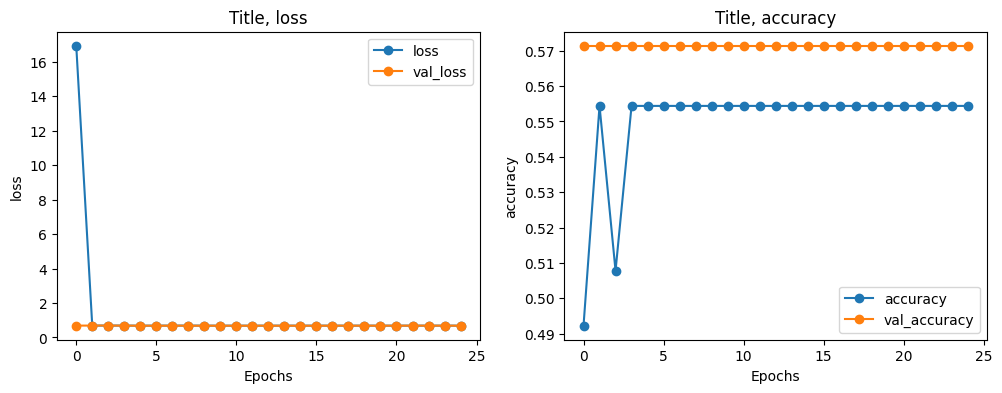

In [172]:
# Fit the model
#model_deep_2.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
model_deep_2.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=0)

# Convert the history to a DataFrame
deep_2_history = pd.DataFrame(model_deep_2.history.history)

# Plot the metrics
plot_metrics(deep_2_history)

In [173]:
history = model_deep_2.evaluate(X_test, y_test)
#model_deep_2_y_pred = model_deep_2.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4524 - loss: 0.7051


c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\Documents\GitHub\Deep-Learning-Daniel-Claesson\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

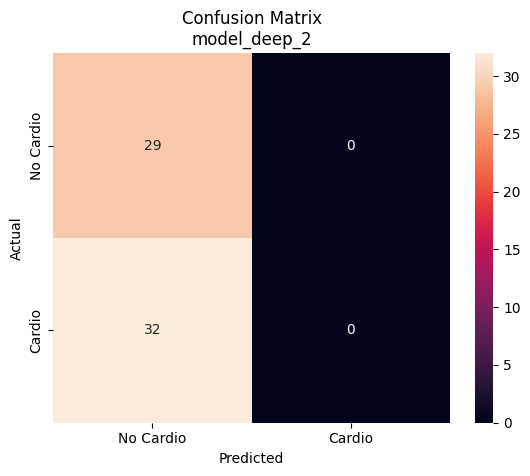

              precision    recall  f1-score   support

   No Cardio       0.48      1.00      0.64        29
      Cardio       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61



In [57]:
plot_confusion_matrix(y_test, model_deep_2_y_pred.argmax(axis=1), ["No Cardio", "Cardio"], model_name="model_deep_2")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---